In [1]:
# Papermill injects parameters here
# Add parameter tag -> Open Command Palette (ctrl+ shift+ p) -> Add Cell Tag -> parameters 

In [2]:
import sys
from pathlib import Path
import pandas as pd
import numpy as np
from pprint import pprint
from IPython.display import display, Markdown

# --- 1. PANDAS & IPYTHON OPTIONS ---
pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 3000*5)
pd.set_option('display.float_format', '{:.6f}'.format)

In [ ]:
# # Parameters
# returns_train_path = "c:\\Users\\ping\\Files_win10\\python\\py311\\stocks\\notebooks_PyPortfOpt\\_working\\temp\\returns_train_chunk_0.parquet"
# returns_test_path = "c:\\Users\\ping\\Files_win10\\python\\py311\\stocks\\notebooks_PyPortfOpt\\_working\\temp\\returns_test_chunk_0.parquet"


In [4]:
# import sys
# from pathlib import Path
# import pandas as pd
# import numpy as np
# from pprint import pprint
# from IPython.display import display, Markdown

# # --- 1. PANDAS & IPYTHON OPTIONS ---
# pd.set_option('display.max_rows', 200)
# pd.set_option('display.max_columns', None)
# pd.set_option('display.width', 3000*5)
# pd.set_option('display.float_format', '{:.6f}'.format)
# %load_ext autoreload
# %autoreload 2

# # --- 2. PROJECT PATH CONFIGURATION ---
# NOTEBOOK_DIR = Path.cwd()
# PARENT_DIR = NOTEBOOK_DIR.parent
# ROOT_DIR = NOTEBOOK_DIR.parent.parent  # Adjust if your notebook is in a 'notebooks' subdirectory
# DATA_DIR = ROOT_DIR / 'data'
# SRC_DIR = ROOT_DIR / 'src'

# # Add 'src' to the Python path to import custom modules
# if str(SRC_DIR) not in sys.path:
#     sys.path.append(str(SRC_DIR))

# # --- 3. IMPORT CUSTOM MODULES ---
# import utils
# import plotting_utils

# # --- 4. INITIAL_CAPITAL ---
# INITIAL_CAPITAL = 100000

# # --- 5. RISK FREE ANNUAL RATE ---
# RISK_FREE_ANNUAL_RATE = 0.04

# # --- 6. VERIFICATION ---
# print("--- Path Configuration ---")
# print(f"✅ Project Root: {ROOT_DIR}")
# print(f"✅ Parent Dir:   {PARENT_DIR}")
# print(f"✅ Notebook Dir: {NOTEBOOK_DIR}")
# print(f"✅ Data Dir:     {DATA_DIR}")
# print(f"✅ Source Dir:   {SRC_DIR}")
# assert all([ROOT_DIR.exists(), DATA_DIR.exists(), SRC_DIR.exists()]), "A key directory was not found!"

# print("\n--- Module Verification ---")
# print(f"✅ Successfully imported 'utils' and 'plotting_utils'.")

In [5]:
import pandas as pd

# Use the papermill injected parameters to read the files
returns_train = pd.read_parquet(returns_train_path)
returns_test = pd.read_parquet(returns_test_path)

In [6]:
# import pandas as pd

# # Read the Parquet file into a DataFrame
# returns_train = pd.read_parquet('returns_train.parquet', engine='pyarrow')
# returns_test = pd.read_parquet('returns_test.parquet', engine='pyarrow')

# parameters injected by papermill
# returns_train = pd.read_csv(returns_train_path, index_col=0, parse_dates=True)
# returns_test = pd.read_csv(returns_test_path, index_col=0, parse_dates=True)

# returns_train = pd.read_parquet(NOTEBOOK_DIR / '_returns_train')
# returns_test = pd.read_parquet(NOTEBOOK_DIR / '_returns_test')

# returns_train = pd.read_parquet(returns_train_path)
# returns_test = pd.read_parquet(returns_test_path)     

In [7]:
# file_list = utils.get_recent_files(
#     directory_path = DATA_DIR,
#     extension = 'parquet', 
#     prefix = None,
#     contains_pattern = 'df_finviz_merged_stocks_etfs',
#     count = None
# )

df_finviz = pd.read_parquet('2025-08-01_df_finviz_merged_stocks_etfs.parquet')

In [8]:
print(f'df_finviz:\n{df_finviz}')

df_finviz:
       No.                                          Company               Index                  Sector                        Industry Country Exchange                                               Info  MktCap AUM, M  Rank  Market Cap, M       P/E   Fwd P/E      PEG       P/S       P/B       P/C     P/FCF   Book/sh   Cash/sh  Dividend %  Dividend TTM Dividend Ex Date  Payout Ratio %       EPS  EPS next Q  EPS this Y %  EPS next Y %  EPS past 5Y %  EPS next 5Y %  Sales past 5Y %  Sales Q/Q %  EPS Q/Q %  EPS YoY TTM %  Sales YoY TTM %      Sales, M     Income, M  EPS Surprise %  Revenue Surprise %  Outstanding, M     Float, M   Float %  Insider Own %  Insider Trans %  Inst Own %  Inst Trans %  Short Float %  Short Ratio  Short Interest, M     ROA %      ROE %    ROIC %   Curr R  Quick R  LTDebt/Eq  Debt/Eq  Gross M %  Oper M %  Profit M %  Perf 3D %  Perf Week %  Perf Month %  Perf Quart %  Perf Half %  Perf Year %  Perf YTD %     Beta      ATR  ATR/Price %  Volatility W %  

In [9]:
# returns_train = train_chunks[i].iloc[:n_test_rows]
# returns_test = train_chunks[i].iloc[n_test_rows:]

In [10]:
print(f'returns_train.shape: {returns_train.shape}')
print(f'returns_test.shape: {returns_test.shape}')

returns_train.shape: (270, 1216)
returns_test.shape: (30, 1216)


In [11]:
import pandas as pd
import numpy as np

# Assuming returns_train is your DataFrame with daily returns

# Extract the last 30, 60, 120, and 240 rows
last_30 = returns_train.iloc[-30:]
last_60 = returns_train.iloc[-60:]
last_120 = returns_train.iloc[-120:]
last_240 = returns_train.iloc[-240:]

# Function to calculate Sharpe ratio
def calculate_sharpe_ratio(returns):
    mean_return = returns.mean()
    std_dev = returns.std()
    sharpe_ratio = mean_return / std_dev
    return sharpe_ratio

# Calculate Sharpe ratios for each subset
sharpe_ratio_30 = calculate_sharpe_ratio(last_30)
sharpe_ratio_60 = calculate_sharpe_ratio(last_60)
sharpe_ratio_120 = calculate_sharpe_ratio(last_120)
sharpe_ratio_240 = calculate_sharpe_ratio(last_240)

# Print the results
print("Sharpe Ratios for the last 30 rows:")
print(sharpe_ratio_30.head())  # Display the first few tickers for brevity

print("Sharpe Ratios for the last 60 rows:")
print(sharpe_ratio_60.head())  # Display the first few tickers for brevity

print("\nSharpe Ratios for the last 120 rows:")
print(sharpe_ratio_120.head())  # Display the first few tickers for brevity

print("\nSharpe Ratios for the last 240 rows:")
print(sharpe_ratio_240.head())  # Display the first few tickers for brevity

Sharpe Ratios for the last 30 rows:
Ticker
A      -0.134441
AA     -0.198395
AAL    -0.123322
AAON   -0.117520
AAPL   -0.168205
dtype: float64
Sharpe Ratios for the last 60 rows:
Ticker
A      -0.013860
AA     -0.100237
AAL    -0.131502
AAON    0.008648
AAPL   -0.173196
dtype: float64

Sharpe Ratios for the last 120 rows:
Ticker
A      -0.017975
AA     -0.049530
AAL    -0.011628
AAON   -0.007669
AAPL   -0.056483
dtype: float64

Sharpe Ratios for the last 240 rows:
Ticker
A      -0.010897
AA     -0.112071
AAL    -0.025114
AAON   -0.004574
AAPL   -0.053473
dtype: float64


In [12]:
# Extract the Sharpe ratio of 'VGT' for each period
vgt_sharpe_30 = sharpe_ratio_30['VGT']
vgt_sharpe_60 = sharpe_ratio_60['VGT']
vgt_sharpe_120 = sharpe_ratio_120['VGT']
vgt_sharpe_240 = sharpe_ratio_240['VGT']

# Find tickers with lower Sharpe ratio than 'VGT' for all four periods
tickers_with_lower_sharpe = sharpe_ratio_30[
    (sharpe_ratio_30 < vgt_sharpe_30) &    
    (sharpe_ratio_60 < vgt_sharpe_60) &
    (sharpe_ratio_120 < vgt_sharpe_120) &
    (sharpe_ratio_240 < vgt_sharpe_240)
].index

n_lower_sharpe_tickers = len(tickers_with_lower_sharpe)
total_ticker_columns = len(returns_train.columns)
pct_lower_sharpe_tickers = n_lower_sharpe_tickers  / total_ticker_columns * 100

print(f"Percentage of tickers with Sharpe Ratio < Benchmark's Sharpe Ratio: {pct_lower_sharpe_tickers:.2f}%")

Percentage of tickers with Sharpe Ratio < Benchmark's Sharpe Ratio: 19.90%


In [13]:
# Create a boolean array
boolean_array_30 = sharpe_ratio_30 < vgt_sharpe_30
boolean_array_60 = sharpe_ratio_60 < vgt_sharpe_60
boolean_array_120 = sharpe_ratio_120 < vgt_sharpe_120
boolean_array_240 = sharpe_ratio_240 < vgt_sharpe_240

# Count the number of True values
count_true_30 = np.sum(boolean_array_30)
count_true_60 = np.sum(boolean_array_60)
count_true_120 = np.sum(boolean_array_120)
count_true_240 = np.sum(boolean_array_240)

print(f'count sharpe_ratio_30 < vgt_sharpe_30: {count_true_30}')
print(f'count sharpe_ratio_60 < vgt_sharpe_60: {count_true_60}')
print(f'count sharpe_ratio_120 < vgt_sharpe_120: {count_true_120}')
print(f'count sharpe_ratio_240 < vgt_sharpe_240: {count_true_240}')

# Print the tickers
print(f"\n{n_lower_sharpe_tickers} tickers, or {pct_lower_sharpe_tickers:.2f}%, have lower Sharpe Ratio than Benchmark for all four periods:")
print(tickers_with_lower_sharpe)

count sharpe_ratio_30 < vgt_sharpe_30: 389
count sharpe_ratio_60 < vgt_sharpe_60: 519
count sharpe_ratio_120 < vgt_sharpe_120: 719
count sharpe_ratio_240 < vgt_sharpe_240: 675

242 tickers, or 19.90%, have lower Sharpe Ratio than Benchmark for all four periods:
Index(['AA', 'AAPL', 'ABT', 'ADSK', 'AER', 'AIRR', 'AJG', 'AKAM', 'AL', 'ALLY',
       ...
       'WY', 'XAR', 'XBI', 'XLB', 'XLF', 'XLV', 'XMHQ', 'XMMO', 'ZBRA', 'ZION'], dtype='object', name='Ticker', length=242)


In [14]:
import numpy as np

# --- 1. Define your selected_tickers (example) ---
# Replace this with your actual list/Series/Index of selected_tickers
selected_tickers = tickers_with_lower_sharpe
# selected_tickers = average_sharpe_ratios.index.tolist() # If you want to use the index from your previous step

# --- 2. Calculate the length ---
num_tickers = len(selected_tickers)

# --- 3. Calculate the uniform weight for each ticker ---
uniform_weight = 1.0 / num_tickers

# --- 4. Create the 1D NumPy array ---

# Method 1: Using np.full (Recommended for clarity when filling with a single value)
selected_weights = np.full(num_tickers, uniform_weight)

# Method 2: Using np.ones and multiplication (also very common)
# selected_weights = np.ones(num_tickers) * uniform_weight

# --- Verify the result ---
print(f"Selected Tickers: {selected_tickers}")
print(f"Number of Tickers: {num_tickers}")
print(f"Uniform Weight per Ticker: {uniform_weight:.4f}")
print(f"Generated Weights Array: {selected_weights}")
print(f"Shape of the array: {selected_weights.shape}")
print(f"Sum of weights (should be approximately 1.0): {selected_weights.sum()}")

Selected Tickers: Index(['AA', 'AAPL', 'ABT', 'ADSK', 'AER', 'AIRR', 'AJG', 'AKAM', 'AL', 'ALLY',
       ...
       'WY', 'XAR', 'XBI', 'XLB', 'XLF', 'XLV', 'XMHQ', 'XMMO', 'ZBRA', 'ZION'], dtype='object', name='Ticker', length=242)
Number of Tickers: 242
Uniform Weight per Ticker: 0.0041
Generated Weights Array: [0.00413223 0.00413223 0.00413223 0.00413223 0.00413223 0.00413223
 0.00413223 0.00413223 0.00413223 0.00413223 0.00413223 0.00413223
 0.00413223 0.00413223 0.00413223 0.00413223 0.00413223 0.00413223
 0.00413223 0.00413223 0.00413223 0.00413223 0.00413223 0.00413223
 0.00413223 0.00413223 0.00413223 0.00413223 0.00413223 0.00413223
 0.00413223 0.00413223 0.00413223 0.00413223 0.00413223 0.00413223
 0.00413223 0.00413223 0.00413223 0.00413223 0.00413223 0.00413223
 0.00413223 0.00413223 0.00413223 0.00413223 0.00413223 0.00413223
 0.00413223 0.00413223 0.00413223 0.00413223 0.00413223 0.00413223
 0.00413223 0.00413223 0.00413223 0.00413223 0.00413223 0.00413223
 0.00413223 0.0

In [15]:
# # --- Code to average the Sharpe Ratios ---

# # 1. Put all Sharpe ratio Series into a list
# all_sharpe_series = [
#     sharpe_ratio_30,
#     sharpe_ratio_60,
#     sharpe_ratio_120,
#     sharpe_ratio_240
# ]

# # 2. Concatenate them into a single DataFrame.
# #    axis=1 means they become columns, aligned by their index.
# df_combined_sharpes = pd.concat(all_sharpe_series, axis=1)

# # print("\n--- Combined DataFrame of Sharpe Ratios ---")
# # print(df_combined_sharpes)

# # 3. Calculate the mean across the columns (axis=1) for each row (each asset).
# #    By default, .mean() will skip NaN values (e.g., 'C' in Sharpe_120, 'X' in Sharpe_30).
# average_sharpe_ratios = df_combined_sharpes.mean(axis=1)

# average_sharpe_ratios['CASH'] = 0
# average_sharpe_ratios

# # print("\n--- Average Sharpe Ratios ---")
# # print(average_sharpe_ratios)

# # print("\n--- Info of the Resulting Series ---")
# # print(average_sharpe_ratios.info())

# # --- Sort the Series in descending order ---
# sorted_sharpe_ratios = average_sharpe_ratios.sort_values(ascending=False)

# print("\n--- Average Sharpe Ratios (Sorted Descending) ---")
# print(sorted_sharpe_ratios.head(20))

In [16]:
# tickers_with_highest_sharpe = sorted_sharpe_ratios.head(20).index

In [17]:
# import numpy as np
# import pandas as pd
# from scipy.cluster.hierarchy import linkage, to_tree
# from scipy.spatial.distance import pdist

# # Filter returns_train to only include tickers in tickers_with_highest_sharpe
# returns_train_filtered = returns_train[tickers_with_highest_sharpe]

# # Calculate the covariance matrix
# cov_matrix = returns_train_filtered.cov()

# # Calculate the distance matrix
# dist_matrix = pdist(cov_matrix, metric='correlation')

# # Perform hierarchical clustering
# linkage_matrix = linkage(dist_matrix, method='single')

# # Convert the linkage matrix to a tree structure
# tree = to_tree(linkage_matrix)

# # Function to get the order of leaves in the dendrogram
# def get_leaf_order(tree):
#     if tree.is_leaf():
#         return [tree.id]
#     return get_leaf_order(tree.left) + get_leaf_order(tree.right)

# # Get the order of leaves
# leaf_order = get_leaf_order(tree)

# # Function to allocate risk proportionally
# def allocate_risk(cov_matrix, leaf_order):
#     n = len(cov_matrix)
#     weights = np.zeros(n)
#     cluster_var = np.diag(cov_matrix)
#     total_var = np.sum(cluster_var)
#     for i, ticker in enumerate(leaf_order):
#         weights[ticker] = cluster_var[i] / total_var
#     return weights

# # Allocate risk proportionally
# weights = allocate_risk(cov_matrix, leaf_order)

# # Select the top 10 tickers with the highest weights
# selected_tickers = returns_train_filtered.columns[np.argsort(weights)[-10:][::-1]]

# # Get the weights for the selected tickers
# selected_weights = weights[np.argsort(weights)[-10:][::-1]]

# # Normalize the selected weights to ensure they sum to 1
# selected_weights /= np.sum(selected_weights)

# if len(selected_tickers) < 10:
#     print(f'===== There are only {len(selected_tickers)} selected_tickers. It is less than 10. Stay in CASH =====')
#     print(f'===== They are {selected_tickers.tolist()} =====\n')
#     selected_tickers = ['CASH']
#     selected_weights = [1.0]    

# # Print the selected tickers and their normalized weights
# print("Selected tickers for the diversified portfolio using HRP:")
# print(selected_tickers)
# print("Normalized portfolio weights for the selected tickers:")
# print(selected_weights)

# # Verify that the weights sum to 1
# print("Sum of weights:", np.sum(selected_weights))

In [18]:
# selected_tickers = ['CASH']
# selected_weights = [1.0]   

Daily values of the portfolio and 'VGT':
            Portfolio_Cumulative  VGT_Cumulative
Date                                            
2016-02-01              0.997364        1.002453
2016-02-02              0.965749        0.982144
2016-02-03              0.973768        0.979888
2016-02-04              0.988518        0.982243
2016-02-05              0.966855        0.945453
2016-02-08              0.939773        0.928382
2016-02-09              0.935767        0.924066
2016-02-10              0.940633        0.928284
2016-02-11              0.921526        0.925046
2016-02-12              0.947058        0.938585
2016-02-16              0.973827        0.958109
2016-02-17              0.997776        0.981654
2016-02-18              0.991509        0.975474
2016-02-19              0.990187        0.979398
2016-02-22              1.009806        0.992838
2016-02-23              0.992074        0.975964
2016-02-24              0.995690        0.985382
2016-02-25              1.00

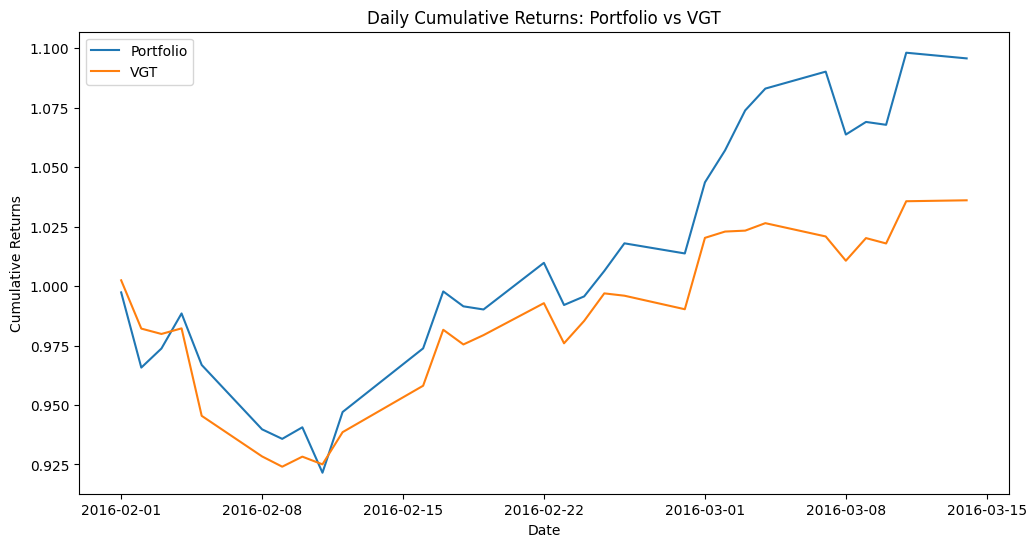

In [19]:
import numpy as np
import pandas as pd

# Ensure returns_test is a DataFrame with daily returns for all tickers
# returns_test should have a DatetimeIndex and columns for each ticker

# Extract the daily returns for the selected tickers
selected_returns = returns_test[selected_tickers]

# Extract the daily returns for 'VGT'
vgt_returns = returns_test['VGT']

# Calculate the daily portfolio value
portfolio_value = selected_returns.dot(selected_weights)

# Create a DataFrame to store the daily values
daily_values = pd.DataFrame({
    'Portfolio': portfolio_value,
    'VGT': vgt_returns
})

# Calculate the cumulative returns for the portfolio and 'VGT'
daily_values['Portfolio_Cumulative'] = (1 + daily_values['Portfolio']).cumprod()
daily_values['VGT_Cumulative'] = (1 + daily_values['VGT']).cumprod()

# Print the daily values
print("Daily values of the portfolio and 'VGT':")
print(daily_values[['Portfolio_Cumulative', 'VGT_Cumulative']])

# Plot the cumulative returns for comparison
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(daily_values.index, daily_values['Portfolio_Cumulative'], label='Portfolio')
plt.plot(daily_values.index, daily_values['VGT_Cumulative'], label='VGT')
plt.title('Daily Cumulative Returns: Portfolio vs VGT')
plt.xlabel('Date')
plt.ylabel('Cumulative Returns')
plt.legend()
plt.show()

In [20]:
import pandas as pd
import os
from pathlib import Path # Use pathlib for cleaner path handling

# Portfolio and Benchmark daily Value to save to csv
# portfolio_daily_return = daily_values[['Portfolio_Cumulative', 'VGT_Cumulative']]
portfolio_daily_return = daily_values[['Portfolio', 'VGT']].copy()

# Define the path for the temporary directory
temp_data_dir = Path("temp")

# >>> FIX: Create the directory if it doesn't exist <<<
temp_data_dir.mkdir(parents=True, exist_ok=True)

# Define the CSV file name
# csv_file_name = 'portfolio daily value.csv'
csv_file_name = temp_data_dir / 'portfolio_daily_return.csv'

# Check if the file exists
if os.path.exists(csv_file_name):
    # Read the existing CSV file into a DataFrame
    existing_data = pd.read_csv(csv_file_name, index_col='Date', parse_dates=True)
    
    # Ensure the existing DataFrame has the same columns as portfolio_daily_return
    existing_data = existing_data[portfolio_daily_return.columns]
    
    # Append the new data to the existing DataFrame
    updated_data = pd.concat([existing_data, portfolio_daily_return], ignore_index=False)
    
    # Save the updated DataFrame back to the CSV file
    updated_data.to_csv(csv_file_name, index=True)
    print(f"Data appended to {csv_file_name}")
else:
    # Save the new DataFrame to the CSV file, including the date index
    portfolio_daily_return.to_csv(csv_file_name, index=True)
    print(f"New file created and data saved to {csv_file_name}")

New file created and data saved to temp\portfolio_daily_return.csv


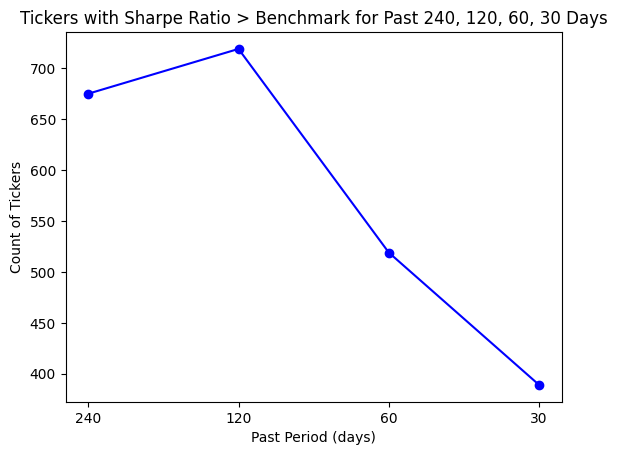

In [21]:
import matplotlib.pyplot as plt
import numpy as np

# Create a list of counts
# counts = [count_true_30, count_true_60, count_true_120, count_true_240]
counts = [count_true_240, count_true_120, count_true_60, count_true_30]

# Create a list of labels for the x-axis
# labels = ['30', '60', '120', '240']
labels = ['240', '120', '60', '30']

# # Create a bar chart
# plt.bar(labels, counts, color=['blue', 'green', 'red', 'purple'])

# Create line chart
plt.plot(labels, counts, marker='o', linestyle='-', color='blue')

# Add titles and labels
# plt.title('Count of True Values for Different Time Periods')
plt.title('Tickers with Sharpe Ratio > Benchmark for Past 240, 120, 60, 30 Days')
plt.xlabel('Past Period (days)')
plt.ylabel('Count of Tickers')

# # Show the plot
plt.show()

In [22]:
import pandas as pd

if selected_tickers[0] != 'CASH':
    # Define the columns you want to include in the new DataFrame
    cols = [
        'Company',
        'Index',
        'Sector',
        'Industry',
        'Info',
    ]

    missing_tickers = []
    
    # Filter out tickers that are not in the DataFrame's index
    valid_tickers = [ticker for ticker in selected_tickers if ticker in df_finviz.index]
    missing_tickers = [ticker for ticker in selected_tickers if ticker not in df_finviz.index]

    # Print missing tickers
    if missing_tickers:
        print(f"The following tickers are not in the df_finviz's index and will be excluded: {missing_tickers}\n")

    # Check if there are any valid tickers left
    if not valid_tickers:
        print("None of the selected tickers are in the DataFrame's index.")
    else:
        # Filter the DataFrame to include only the valid tickers
        df_selected = df_finviz.loc[valid_tickers]

        # Select the specified columns
        df_selected = df_selected[cols]

        # Print the resulting DataFrame
        print("DataFrame with selected tickers and specified columns:")
        print(df_selected)
else:
    print(f'All CASH portfolio')

The following tickers are not in the df_finviz's index and will be excluded: ['CAR', 'FSK', 'GNTX', 'KRC', 'KRE', 'MTDR', 'SLYG', 'VTHR']

DataFrame with selected tickers and specified columns:
                              Company               Index           Sector                   Industry                                               Info
AA                         Alcoa Corp                   -  Basic Materials                   Aluminum                          Basic Materials, Aluminum
AAPL                        Apple Inc  DJIA, NDX, S&P 500       Technology       Consumer Electronics                   Technology, Consumer Electronics
ABT               Abbott Laboratories             S&P 500       Healthcare            Medical Devices                        Healthcare, Medical Devices
ADSK                     Autodesk Inc        NDX, S&P 500       Technology     Software - Application                 Technology, Software - Application
AER               Aercap Holdings N.V    

In [23]:
print(f'count sharpe_ratio_30 < vgt_sharpe_30: {count_true_30}')
print(f'count sharpe_ratio_60 < vgt_sharpe_60: {count_true_60}')
print(f'count sharpe_ratio_120 < vgt_sharpe_120: {count_true_120}')
print(f'count sharpe_ratio_240 < vgt_sharpe_240: {count_true_240}')

# Print the tickers
print(f"\n{n_lower_sharpe_tickers} tickers, or {pct_lower_sharpe_tickers:.2f}%, have lower Sharpe Ratio than Benchmark for all four periods:")
print(tickers_with_lower_sharpe)

count sharpe_ratio_30 < vgt_sharpe_30: 389
count sharpe_ratio_60 < vgt_sharpe_60: 519
count sharpe_ratio_120 < vgt_sharpe_120: 719
count sharpe_ratio_240 < vgt_sharpe_240: 675

242 tickers, or 19.90%, have lower Sharpe Ratio than Benchmark for all four periods:
Index(['AA', 'AAPL', 'ABT', 'ADSK', 'AER', 'AIRR', 'AJG', 'AKAM', 'AL', 'ALLY',
       ...
       'WY', 'XAR', 'XBI', 'XLB', 'XLF', 'XLV', 'XMHQ', 'XMMO', 'ZBRA', 'ZION'], dtype='object', name='Ticker', length=242)


In [24]:
if selected_tickers[0] != 'CASH':
    print(f'returns[missing_tickers]:\n{returns_train[missing_tickers]}')
else:
    print(f'returns["CASH"]:\n{returns_train["CASH"]}')

returns[missing_tickers]:
Ticker           CAR       FSK      GNTX       KRC       KRE      MTDR      SLYG      VTHR
Date                                                                                      
2015-01-05 -0.036394 -0.004056 -0.019046  0.008513 -0.027848 -0.085232 -0.014008 -0.012103
2015-01-06 -0.000777 -0.010177 -0.019989 -0.003237 -0.023785 -0.031234 -0.014263 -0.009887
2015-01-07  0.032197  0.013371  0.015734  0.008328  0.005502  0.040441  0.012368  0.011506
2015-01-08  0.012809  0.012181  0.023520  0.006859  0.021627  0.056194  0.021499  0.016311
2015-01-09 -0.017259 -0.002001 -0.008965  0.005561 -0.029074 -0.008951 -0.008295 -0.004541
...              ...       ...       ...       ...       ...       ...       ...       ...
2016-01-25 -0.027992 -0.011194 -0.013931 -0.007583 -0.041700 -0.093272 -0.016349 -0.016272
2016-01-26  0.085604  0.000000  0.034200  0.028608  0.025409  0.055219  0.024324  0.013843
2016-01-27 -0.030887  0.003773 -0.040974 -0.015547  0.013384 -0.